Found 6 clusters.


<ipython-input-2-a78450b1a62b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = est.labels_


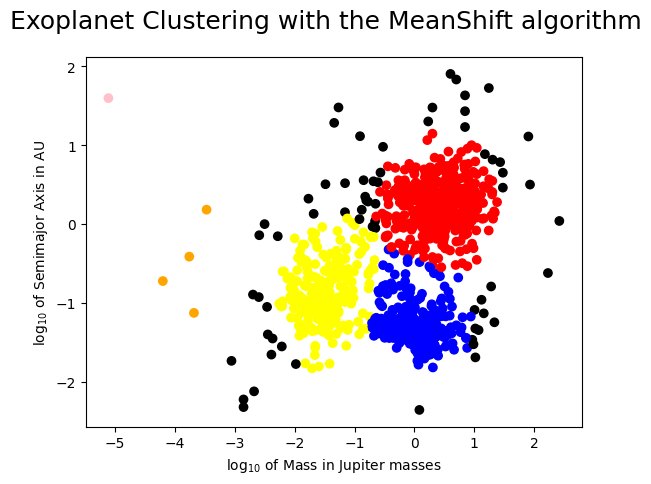

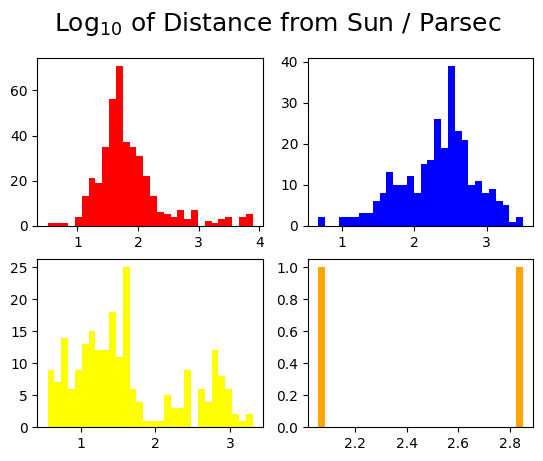

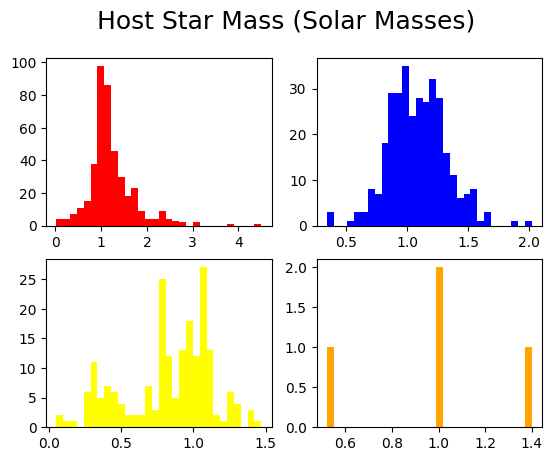

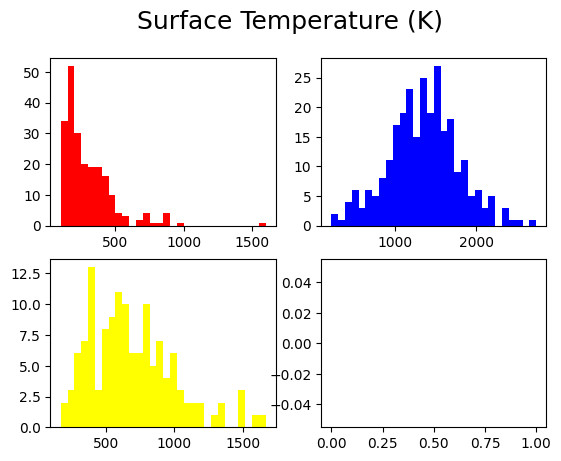

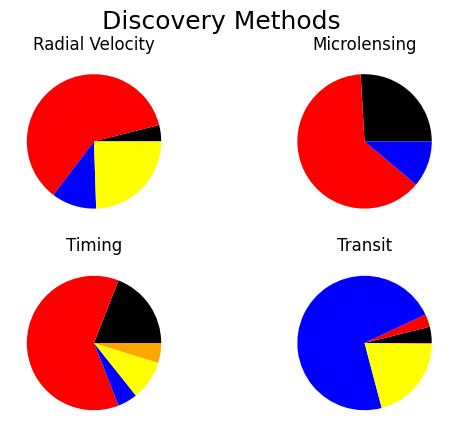

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as skc


# read data
df_raw = pd.read_csv('oec.csv')

# get rid of nan
df = df_raw[df_raw['PlanetaryMassJpt'].notnull() & df_raw['SemiMajorAxisAU'].notnull()]

# log of mass and distance to star
logM = np.log10(df['PlanetaryMassJpt'])
logD = np.log10(df['SemiMajorAxisAU'])

# prepare input matrix
input = [logM, logD]
X = np.array([logM, logD]).T

# invoke clustering algorithm

est = skc.MeanShift(cluster_all = False)
est.fit(X)

nclusters = len(np.unique(est.labels_))
print("Found", nclusters, "clusters.")

# add cluster labels to dataframe

df['label'] = est.labels_

df_red = df[ df['label'] == 0 ]
df_blue = df[ df['label'] == 1]
df_yellow = df[ df['label'] == 2]
df_orange = df[ df['label'] == 3]

# make a scatter plot of the results

def numbers_to_colors(argument):
    switcher = {
        0: "red",
        1: "blue",
        2: "yellow",
        3: "orange",
        4: "pink"
    }
    return switcher.get(argument, "black")

c = [numbers_to_colors(number) for number in est.labels_]

fig = plt.figure(1)

ax = fig.add_subplot(111)
fig.suptitle('Exoplanet Clustering with the MeanShift algorithm', fontsize=18)
ax.set_xlabel('log$_{10}$ of Mass in Jupiter masses')
ax.set_ylabel('log$_{10}$ of Semimajor Axis in AU')
ax.scatter(logM, logD, color=c)
fig.savefig('fig1.png')

# make some histograms

def make_histo(axes, dframe, feature, color, log=False):
    df_clean = dframe[dframe[feature].notnull()]
    if log:
        logF = np.log10(df_clean[feature])
        axes.hist(logF, bins=30, facecolor=color)
    else:
        axes.hist(df_clean[feature], bins=30, facecolor=color)

def make_4histos(figure, feature, title, log=False):
    figure.suptitle(title, fontsize=18)
    ax1 = figure.add_subplot(221)
    make_histo(ax1, df_red, feature, 'red', log)
    ax2 = figure.add_subplot(222)
    make_histo(ax2, df_blue, feature, 'blue', log)
    ax3 = figure.add_subplot(223)
    make_histo(ax3, df_yellow, feature, 'yellow', log)
    ax4 = figure.add_subplot(224)
    make_histo(ax4, df_orange, feature, 'orange', log)


fig2 = plt.figure(2)
make_4histos(fig2, 'DistFromSunParsec', 'Log$_{10}$ of Distance from Sun / Parsec', log=True)
fig2.savefig('fig2.png')

fig3 = plt.figure(3)
make_4histos(fig3, 'HostStarMassSlrMass', 'Host Star Mass (Solar Masses)')
fig3.savefig('fig3.png')

fig4 = plt.figure(4)
make_4histos(fig4, 'SurfaceTempK', 'Surface Temperature (K)')
fig4.savefig('fig4.png')

# make a bar plot




s = df.groupby(['DiscoveryMethod','label']).size()
c = ['black', 'red', 'blue', 'yellow', 'orange']

fig5 = plt.figure(5)
fig5.suptitle("Discovery Methods", fontsize=18)

ax51 = fig5.add_subplot(221)
ax51.set_title('Radial Velocity')
ax51.pie(s['RV'], colors=c)

ax52 = fig5.add_subplot(222)
ax52.set_title('Microlensing')
ax52.pie(s['microlensing'], colors=c)

ax53 = fig5.add_subplot(223)
ax53.set_title('Timing')
ax53.pie(s['timing'], colors=c)

ax54 = fig5.add_subplot(224)
ax54.set_title('Transit')
ax54.pie(s['transit'], colors=c)

fig5.savefig('fig5.png')



In [ ]:
import joblib
joblib.dump(est, 'mean_shift_clustering_model.joblib')

['mean_shift_clustering_model.joblib']